# Getting Started

This notebook will run through the important data structures designed in the Cholla-API

Cholla snapshots, skewers, and analysis files are outputted as HDF5 files. We use the python package `h5py` to load and manipulate the data saved in these files. We also use `numpy` for array manipulation

In [1]:
import numpy as np
import h5py

The two most basic data structures are the `ChollaGrid` and `ChollaBoxHead`

In [2]:
from cholla_api.run.ChollaGrid import ChollaGrid
from cholla_api.data.ChollaBox import ChollaBoxHead

Let's analyze a simulation ran on $2048^3$ cells where each side is of length $50,000 h^{-1} \rm{kpc}$, which was ran on 512 processes.

In [3]:
nprocs = 512
nx, ny, nz = 2048, 2048, 2048
xmin, xmax = 0., 50000.0
ymin, ymax = 0., 50000.0
zmin, zmax = 0., 50000.0

grid = ChollaGrid(nprocs, nx, ny, nz, xmin, ymin, zmin, xmax, ymax, zmax)

During initialization of a `ChollaGrid` object, the domain decomposition is performed so that the instance holds local dimensions and the xyz indices for each box.

In [4]:
grid.__dict__

{'nprocs': 512,
 'nx_global': 2048,
 'ny_global': 2048,
 'nz_global': 2048,
 'xmin': 0.0,
 'Lx': 50000.0,
 'dx': 24.4140625,
 'ymin': 0.0,
 'Ly': 50000.0,
 'dy': 24.4140625,
 'zmin': 0.0,
 'Lz': 50000.0,
 'dz': 24.4140625,
 'nproc_x': 8,
 'nproc_y': 8,
 'nproc_z': 8,
 'nx_local': 256,
 'ny_local': 256,
 'nz_local': 256,
 'index_x': array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
        6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3,
        4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1,
        2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7,
        0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
        6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3,
        4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1,
        2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7,
        0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
 

We can use the `get_BoxHead(nBox)` method to receive the `ChollaBoxHead` object that will hold the information that defines the `nBox` process within the global grid.

In [5]:
boxHead0 = grid.get_BoxHead(0)
boxHead1 = grid.get_BoxHead(1)
boxHead511 = grid.get_BoxHead(511)

In [6]:
boxHead0.__dict__

{'nBox': 0,
 'offset': (0, 0, 0),
 'local_dims': (256, 256, 256),
 'local_xmin': 0.0,
 'local_xmax': 6250.0,
 'local_ymin': 0.0,
 'local_ymax': 6250.0,
 'local_zmin': 0.0,
 'local_zmax': 6250.0}

In [7]:
boxHead1.__dict__

{'nBox': 1,
 'offset': (256, 0, 0),
 'local_dims': (256, 256, 256),
 'local_xmin': 6250.0,
 'local_xmax': 12500.0,
 'local_ymin': 0.0,
 'local_ymax': 6250.0,
 'local_zmin': 0.0,
 'local_zmax': 6250.0}

In [8]:
boxHead511.__dict__

{'nBox': 511,
 'offset': (1792, 1792, 1792),
 'local_dims': (256, 256, 256),
 'local_xmin': 43750.0,
 'local_xmax': 50000.0,
 'local_ymin': 43750.0,
 'local_ymax': 50000.0,
 'local_zmin': 43750.0,
 'local_zmax': 50000.0}

By default, a `ChollaBoxHead` is only initialized by its process id, the xyz offset, and xyz local dimensions, but the `get_BoxHead(nBox)` method also calls the `set_coords` method to attach the coordinate system to it too.

In [9]:
nBox = 0
offsets = 0, 0, 0
local_dims = 256, 256, 256

boxHead0_base = ChollaBoxHead(nBox, offsets[0], offsets[1], offsets[2], local_dims[0],
                              local_dims[1], local_dims[2])

nBox = 511
offsets = 1792, 1792, 1792
local_dims = 256, 256, 256

boxHead511_base = ChollaBoxHead(nBox, offsets[0], offsets[1], offsets[2], local_dims[0],
                              local_dims[1], local_dims[2])

In [10]:
boxHead0_base.__dict__

{'nBox': 0, 'offset': (0, 0, 0), 'local_dims': (256, 256, 256)}

In [11]:
boxHead511_base.__dict__

{'nBox': 511, 'offset': (1792, 1792, 1792), 'local_dims': (256, 256, 256)}

That's all cool, but we want to actually interact with the data within one of these boxes. To do that, we create an instance of a `ChollaBox` object with the path to the snapshot.

Let's look at a snapshot on Frontier..

In [12]:
from cholla_api.data.ChollaBox import ChollaBox

In [13]:
# path to first output snapshot
basesim_path = "/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB"
data_path = basesim_path + "/data"
snapshot1path = data_path + "/1"

In [14]:
box0 = ChollaBox(snapshot1path, boxHead0)

In [15]:
box0.__dict__

{'BoxHead': <cholla_api.data.ChollaBox.ChollaBoxHead at 0x7f9ed750c2e0>,
 'SnapPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data/1',
 'energy_str': 'Energy',
 'density_str': 'density',
 'momx_str': 'momentum_x',
 'momy_str': 'momentum_y',
 'momz_str': 'momentum_z',
 'gasenergy_str': 'GasEnergy',
 'hydro_allkeys': {'Energy',
  'GasEnergy',
  'density',
  'momentum_x',
  'momentum_y',
  'momentum_z'},
 'densityCIC_str': 'density',
 'particleID_str': 'particle_IDs',
 'posx_str': 'pos_x',
 'posy_str': 'pos_y',
 'posz_str': 'pos_z',
 'velx_str': 'vel_x',
 'vely_str': 'vel_y',
 'velz_str': 'vel_z',
 'particle_allkeys': {'density',
  'particle_IDs',
  'pos_x',
  'pos_y',
  'pos_z',
  'vel_x',
  'vel_y',
  'vel_z'},
 'potential_str': 'potential',
 'gravity_allkeys': {'potential'}}

With this `ChollaBox` object, we can easily find the path to the corresponding files

In [16]:
print(box0.get_hydrofPath())
print(box0.get_particlefPath())
print(box0.get_gravityfPath())

/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data/1/1.h5.0
/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data/1/1_particles.h5.0
/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data/1/1_gravity.h5.0


We can also check whether a user-requested key is valid or not, by comparing against the set attributes

In [17]:
misspelled_density = "demsity"
spelled_density = "density"

print(f"Is the user-requested key of {spelled_density} a key in hydro files? {box0.check_hydrokey(misspelled_density)}")
print(f"Is the user-requested key of {misspelled_density} a key in hydro files? {box0.check_hydrokey(spelled_density)}")

misspelled_xpos = "pos-x"
spelled_xpos = "pos_x"

print(f"Is the user-requested key of {misspelled_xpos} a key in particle files? {box0.check_particlekey(misspelled_xpos)}")
print(f"Is the user-requested key of {spelled_xpos} a key in particle files? {box0.check_particlekey(spelled_xpos)}")

Is the user-requested key of density a key in hydro files? False
Is the user-requested key of demsity a key in hydro files? True
Is the user-requested key of pos-x a key in particle files? False
Is the user-requested key of pos_x a key in particle files? True


Finally: how do we actually get some data from the box? Well we can call the following methods

In [18]:
density0 = box0.get_hydrodata(box0.density_str) # gas density
density_CIC0 = box0.get_particledata(box0.densityCIC_str) # DM density

Let's plot a y-projection of the dark matter and gas density using `matplotlib`

In [19]:
import matplotlib.pyplot as plt

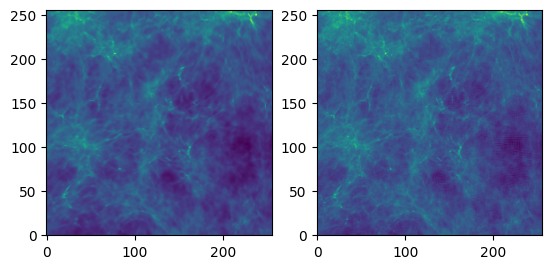

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2)

_ = ax[0].imshow(np.log10(np.sum(density0, axis=1)), origin='lower')
_ = ax[1].imshow(np.log10(np.sum(density_CIC0, axis=1)), origin='lower')

Looking at the offsets for `box0` and `box1`, we can note that `box1` is tiled right next to `box0`, sharing a boundary at the x cell 256

So, let's do this for the box nextdoor

In [21]:
box1 = ChollaBox(snapshot1path, boxHead1)

In [22]:
density1 = box1.get_hydrodata(box1.density_str) # gas density
density_CIC1 = box1.get_particledata(box1.densityCIC_str) # DM density

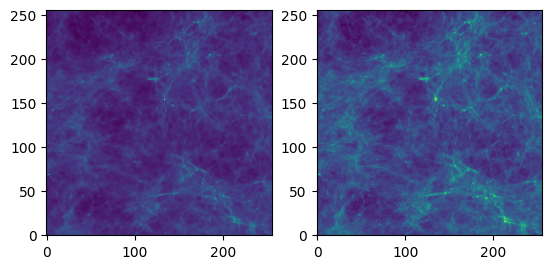

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2)

_ = ax[0].imshow(np.log10(np.sum(density1, axis=1)), origin='lower')
_ = ax[1].imshow(np.log10(np.sum(density_CIC1, axis=1)), origin='lower')

Cool, great ! We can use the attributes attached to each box to create a global array holding both boxes.

In [24]:
# grab the lower & upper x cell limit for box0
box0_xlow = box0.BoxHead.offset[0]
box0_xupp = box0.BoxHead.offset[0] + box0.BoxHead.local_dims[0]

# grab the lower & upper x cell limit for box1
box1_xlow = box1.BoxHead.offset[0]
box1_xupp = box1.BoxHead.offset[0] + box1.BoxHead.local_dims[0]

# grab the shared number of y and z cells
num_ycells, num_zcells = box0.BoxHead.local_dims[1], box0.BoxHead.local_dims[2]

# total number of x cells
num_xcells = box0.BoxHead.local_dims[0] + box1.BoxHead.local_dims[0]

# create global arrays for both
density01 = np.zeros((num_xcells, num_ycells, num_zcells))
density_CIC01 = np.zeros((num_xcells, num_ycells, num_zcells))

# place box0 data
density01[box0_xlow:box0_xupp, :, :] = density0
density_CIC01[box0_xlow:box0_xupp,:,:] = density_CIC0

# place box1 data
density01[box1_xlow:box1_xupp, :, :] = density1
density_CIC01[box1_xlow:box1_xupp,:,:] = density_CIC1

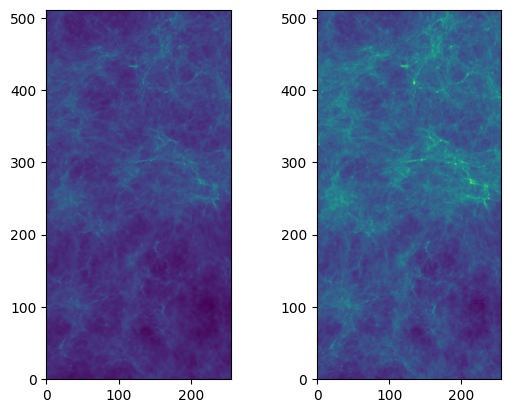

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2)

_ = ax[0].imshow(np.log10(np.sum(density01, axis=1)), origin='lower')
_ = ax[1].imshow(np.log10(np.sum(density_CIC01, axis=1)), origin='lower')

We can just as easily make the projection along the z-axis

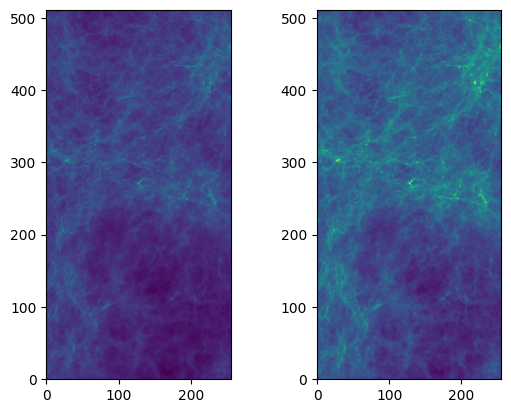

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2)

_ = ax[0].imshow(np.log10(np.sum(density01, axis=2)), origin='lower')
_ = ax[1].imshow(np.log10(np.sum(density_CIC01, axis=2)), origin='lower')

We also know that there is snapshot-wide information that can be stored, just like there is box-wide information that is held in `ChollaBoxHead`. For that, we have the `ChollaSnapHead` object

In [27]:
from cholla_api.snap.ChollaSnap import ChollaSnapHead

In [28]:
nSnap = 1
snapHead1 = ChollaSnapHead(nSnap)

In [29]:
snapHead1.__dict__

{'nSnap': 1}

We can use a `ChollaBox` instance to set particle, time, and cosmology information for this snapshot

In [30]:
snapHead1.set_timeinfo(box0)
snapHead1.set_cosmoinfo(box0)
snapHead1.set_particleinfo(box0)

In [31]:
snapHead1.__dict__

{'nSnap': 1,
 't': 24.893115544789627,
 'dt': 0.005860271839791953,
 'a': 0.1,
 'z': 9.0,
 't_particles': 24.893115544789627,
 'dt_particles': 0.0008604142460726607}

Also just like we can tie a `ChollaBoxHead` to a specific set of files with `ChollaBox`, we can tie `ChollaSnapHead` to a specific directory of files with the `ChollaSnap` object

In [32]:
from cholla_api.snap.ChollaSnap import ChollaSnap

In [33]:
snap1 = ChollaSnap(data_path, snapHead1)

For an upper-level of abstraction, we have a method that, given a `ChollaBoxHead`, will create a `ChollaBox` and return some desired dataset

In [34]:
density_fromsnap = snap1.get_hydroboxdata(boxHead0, "density")

In [35]:
# this loads the same data as the variable density0 from earlier in the notebook
np.sum(density0 != density_fromsnap)

0

One level of abstraction higher, we can hold simulation-wide information that spans all snapshots, in the `ChollaGlobal` object

In [36]:
from cholla_api.run.ChollaGlobal import ChollaGlobal

In [37]:
gravity_flag, particles_flag, cosmo_flag = True, True, True
chGlobal = ChollaGlobal(basesim_path, grid, gravity_flag, particles_flag, cosmo_flag)

In [38]:
chGlobal.__dict__

{'dataPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data',
 'grid': <cholla_api.run.ChollaGrid.ChollaGrid at 0x7f9ed750e680>,
 'gravity_flag': True,
 'particles_flag': True,
 'cosmo_flag': True}

This object allows for easy instantiation of a `ChollaBox` object...

In [39]:
nSnap, nBox = 1, 0
box_fromGlobal = chGlobal.get_snapbox(nSnap, nBox)

In [40]:
box_fromGlobal.__dict__

{'BoxHead': <cholla_api.data.ChollaBox.ChollaBoxHead at 0x7f9ed412dcf0>,
 'SnapPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data/1',
 'energy_str': 'Energy',
 'density_str': 'density',
 'momx_str': 'momentum_x',
 'momy_str': 'momentum_y',
 'momz_str': 'momentum_z',
 'gasenergy_str': 'GasEnergy',
 'hydro_allkeys': {'Energy',
  'GasEnergy',
  'density',
  'momentum_x',
  'momentum_y',
  'momentum_z'},
 'densityCIC_str': 'density',
 'particleID_str': 'particle_IDs',
 'posx_str': 'pos_x',
 'posy_str': 'pos_y',
 'posz_str': 'pos_z',
 'velx_str': 'vel_x',
 'vely_str': 'vel_y',
 'velz_str': 'vel_z',
 'particle_allkeys': {'density',
  'particle_IDs',
  'pos_x',
  'pos_y',
  'pos_z',
  'vel_x',
  'vel_y',
  'vel_z'},
 'potential_str': 'potential',
 'gravity_allkeys': {'potential'}}

as well as a instantation of a `ChollaSnap` object

In [41]:
nSnap, nBoxforAttrs = 1, 0
snap_fromGlobal = chGlobal.get_snap(nSnap, nBoxforAttrs)

In [42]:
snap_fromGlobal.__dict__

{'SnapHead': <cholla_api.snap.ChollaSnap.ChollaSnapHead at 0x7f9ed412e770>,
 'SnapPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data/1'}

In [43]:
snap_fromGlobal.SnapHead.__dict__

{'nSnap': 1,
 't': 24.893115544789627,
 'dt': 0.005860271839791953,
 'a': 0.1,
 'z': 9.0,
 't_particles': 24.893115544789627,
 'dt_particles': 0.0008604142460726607}

We can use a specific snapshot number and box number to set the global attributes

In [44]:
nSnap, nBox = 1, 0
chGlobal.set_globalattrs(nSnap, nBox)

In [45]:
chGlobal.__dict__

{'dataPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data',
 'grid': <cholla_api.run.ChollaGrid.ChollaGrid at 0x7f9ed750e680>,
 'gravity_flag': True,
 'particles_flag': True,
 'cosmo_flag': True,
 'length_unit': 3.08567758e+21,
 'mass_unit': 1.98847e+33,
 'time_unit': 31556900000.0,
 'dims': array([2048, 2048, 2048], dtype=int32),
 'domain': array([50000., 50000., 50000.]),
 'dx': array([24.4140625, 24.4140625, 24.4140625]),
 'gamma': 1.6666666666666667,
 'H0': 0.06797,
 'Omega_L': 0.6931,
 'Omega_M': 0.3069,
 'paticle_mass_unit': 1043545.0}

While the units saved are only the three base units of length, time, and mass, we can also save the other units that can be derived from those three, if desired

In [46]:
nSnap, nBox = 1, 0
chGlobal.set_globalattrs(nSnap, nBox, all_units=True)

In [47]:
chGlobal.__dict__

{'dataPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/data',
 'grid': <cholla_api.run.ChollaGrid.ChollaGrid at 0x7f9ed750e680>,
 'gravity_flag': True,
 'particles_flag': True,
 'cosmo_flag': True,
 'length_unit': 3.08567758e+21,
 'mass_unit': 1.98847e+33,
 'time_unit': 31556900000.0,
 'dims': array([2048, 2048, 2048], dtype=int32),
 'domain': array([50000., 50000., 50000.]),
 'dx': array([24.4140625, 24.4140625, 24.4140625]),
 'gamma': 1.6666666666666667,
 'H0': 0.06797,
 'Omega_L': 0.6931,
 'Omega_M': 0.3069,
 'paticle_mass_unit': 1043545.0,
 'density_unit': 6.768109993794354e-32,
 'energy_unit': 6.471125625382408e-10,
 'velocity_unit': 97781391074.53522}

Boom! Now we have the density, energy, and velocity units also attached !

We want to actually do some sort of analysis with these saved data values, which is why we have included a hydro calculator `ChollaHydroCalculator`

In [48]:
from cholla_api.analysis.ChollaHydroCalculator import ChollaHydroCalculator

The `ChollaHydroCalculator` object is initialized simply with the dimensions that the input data arrays are expected

In [49]:
boxCalc0 = ChollaHydroCalculator(boxHead0.local_dims)

Now to calculate some values, we need to pass the actual values from the box. For example, to calculate the peculiar velocity of the gas, we have

$$
v_x = \frac{\rho}{p_x}
$$

where $\rho$ is the mass density and $p_x$ is the x-momentum

In [50]:
momx0 = box0.get_hydrodata(box0.momx_str)
vx = boxCalc0.velx(density0, momx0)

To calculate the pressure of the gas, we can use the ideal gas equation

$$
P = GE ( \gamma - 1.0)
$$

where $GE$ is the gas energy and $\gamma$ is the adiabatic index

In [51]:
ge0 = box0.get_hydrodata(box0.gasenergy_str)
pressure = boxCalc0.pressure_DE(ge0, chGlobal.gamma)

If we do not have the as energy, we can also compute the pressure from the difference of the total and kinetic energy

$$
P = \left(E - \frac{\rho}{2}\left(\left(\frac{p_x}{\rho}\right)^2 + \left(\frac{p_y}{\rho}\right)^2 + \left(\frac{p_z}{\rho}\right)^2 \right) \right) ( \gamma - 1.0)
$$

where $p_i$ is the $i$-momentum

In [52]:
energy0 = box0.get_hydrodata(box0.energy_str)
momy0 = box0.get_hydrodata(box0.momy_str)
momz0 = box0.get_hydrodata(box0.momz_str)
pressure_noDE = boxCalc0.pressure_noDE(energy0, density0, momx0, momy0, momz0, chGlobal.gamma)

To calculate the temperature we can use the equation

$$
k_B T = \mu m_P \epsilon (\gamma - 1.0)
$$

where $k_B$ is the Boltzmann constant, $\mu$ is the mean molecular weight, $m_P$ is the mass of a proton, and $\epsilon$ is the specific internal energy. To calculate the specific internal energy we can use

$$
\epsilon = \frac{GE}{\rho}
$$

so that the temperature equation is

$$
T = \frac{\mu m_P GE (\gamma - 1.0)}{k_B \rho}
$$

In [53]:
mu = 0.6
energy_unit = 1e10 # conversion from code units (km2 s-2) to (cm2 s-2)
temp0 = boxCalc0.gas_temp(ge0, density0, chGlobal.gamma, mu, energy_unit)

Looking at the temperature distribution...

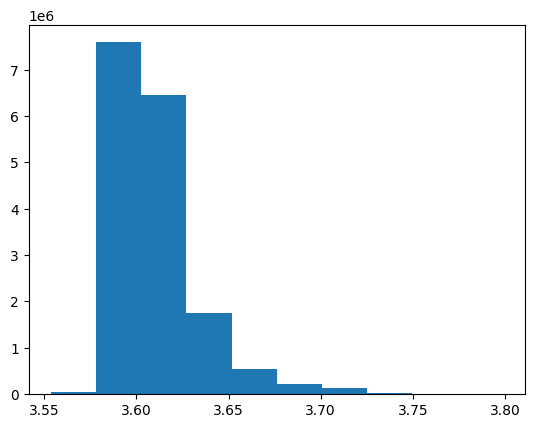

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1)
_ = ax.hist(np.log10(temp0.flatten()))

we can note that the temperature in this box is around $T \sim 10^{3.6} \rm{K}$. We can make a y-projection of the temperature so see how this is distributed, with respect to the gas density and dark matter density.

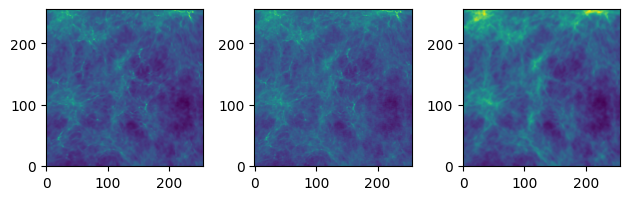

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3)

_ = ax[0].imshow(np.log10(np.sum(density0, axis=1)), origin='lower')
_ = ax[1].imshow(np.log10(np.sum(density_CIC0, axis=1)), origin='lower')
_ = ax[2].imshow(np.log10(np.sum(temp0, axis=1)), origin='lower')

_ = plt.tight_layout()

For a higher-level of abstraction, we can tie this calculator to a specific box with a `ChollaBoxHydroCalc`, which handles all of the loading methods

In [56]:
from cholla_api.data.ChollaBoxHydroCalc import ChollaBoxHydroCalc

In [57]:
boxCalc0 = ChollaBoxHydroCalc(box0)

In [58]:
mu = 0.6
energy_unit = 1e10 # conversion from code units (km2 s-2) to (cm2 s-2)
temp0 = boxCalc0.get_gastemp(chGlobal.gamma, mu, energy_unit)

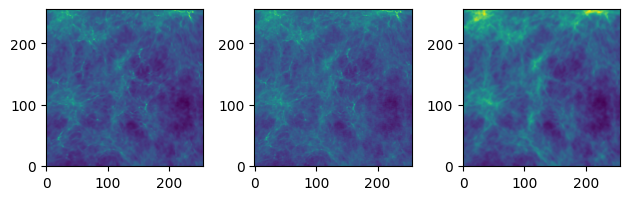

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3)

_ = ax[0].imshow(np.log10(np.sum(density0, axis=1)), origin='lower')
_ = ax[1].imshow(np.log10(np.sum(density_CIC0, axis=1)), origin='lower')
_ = ax[2].imshow(np.log10(np.sum(temp0, axis=1)), origin='lower')

_ = plt.tight_layout()

Likewise, we can tie this calculator to a specific snapshot with `ChollaSnapHydroCalc`, which handles looping over each box and completing the calculation.

In [60]:
from cholla_api.snap.ChollaSnapHydroCalc import ChollaSnapHydroCalc

In [61]:
snapCalc0 = ChollaSnapHydroCalc(snap1, grid)

### Analysis Files

If the Cholla executable was compiled to also output skewers and analysis files, we have similarly created objects to interact with them. Here we describe the basic data structures

To describe a singular skewer, we need two numbers and a string to initialize a `ChollaOnTheFlySkewerHead` object

In [62]:
from cholla_api.OTFanalysis.ChollaOnTheFlySkewers import ChollaOnTheFlySkewerHead

In [63]:
skew_id = 0
n_x = grid.nx_global # length of the skewer
skewx_key = 'skewers_x' # key in skewer file

skewHead0 = ChollaOnTheFlySkewerHead(skew_id, n_x, skewx_key)

In [64]:
skewHead0.__dict__

{'skew_id': 0, 'n_i': 2048, 'skew_key': 'skewers_x'}

We can tie this header of the skewer with id=0 to an actual skewer using the file path to a skewer file to create a `ChollaOnTheFlySkewer` object

In [65]:
from cholla_api.OTFanalysis.ChollaOnTheFlySkewers import ChollaOnTheFlySkewer

In [66]:
skewers_dir = basesim_path + "/skewers"
skew_fName = "0_skewers.h5"
skew_fPath = skewers_dir + "/" + skew_fName

skew0 = ChollaOnTheFlySkewer(skewHead0, skew_fPath)

In [67]:
skew0.__dict__

{'OTFSkewerHead': <cholla_api.OTFanalysis.ChollaOnTheFlySkewers.ChollaOnTheFlySkewerHead at 0x7f9ed5ccd960>,
 'fPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/skewers/0_skewers.h5',
 'HI_str': 'HI_density',
 'HeII_str': 'HeII_density',
 'density_str': 'density',
 'vel_str': 'los_velocity',
 'temp_str': 'temperature',
 'allkeys': {'HI_density',
  'HeII_density',
  'density',
  'los_velocity',
  'temperature'}}

We can grab the actual data from this skewer with the `get_skewerdata(key)` method

In [68]:
density_skew0 = skew0.get_skewerdata(skew0.density_str)
densityHI_skew0 = skew0.get_skewerdata(skew0.HI_str)
temp_skew0 = skew0.get_skewerdata(skew0.temp_str)

Plotting data from the skewers...

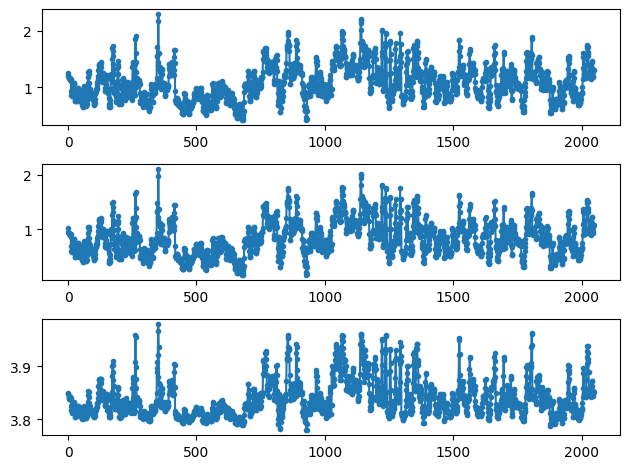

In [69]:
fig, ax = plt.subplots(nrows=3, ncols=1)

_ = ax[0].plot(np.log10(density_skew0), marker='.')
_ = ax[1].plot(np.log10(densityHI_skew0), marker='.')
_ = ax[2].plot(np.log10(temp_skew0), marker='.')

_ = plt.tight_layout()

We have created the `ChollaOnTheFlySkewers_iHead` which holds information regarding all of the skewers along an axis

In [70]:
from cholla_api.OTFanalysis.ChollaOnTheFlySkewers import ChollaOnTheFlySkewers_iHead

In [71]:
# length of the y-z plane along each dimension
n_y, n_z = grid.ny_global, grid.nz_global

# stride steps between each skewer
n_stride = 4
skewiHead = ChollaOnTheFlySkewers_iHead(n_x, n_y, n_z, n_stride, skewx_key)

In [72]:
skewiHead.__dict__

{'n_i': 2048,
 'n_j': 2048,
 'n_k': 2048,
 'n_stride': 4,
 'skew_key': 'skewers_x',
 'n_skews': 262144}

To tie this header to an actual implementation, we again use the path to a skewer output file to create a `ChollaOnTheFlySkewers_i` object

In [73]:
from cholla_api.OTFanalysis.ChollaOnTheFlySkewers import ChollaOnTheFlySkewers_i

In [74]:
skewi = ChollaOnTheFlySkewers_i(skewiHead, skew_fPath)

In [75]:
skewi.__dict__

{'OTFSkewersiHead': <cholla_api.OTFanalysis.ChollaOnTheFlySkewers.ChollaOnTheFlySkewers_iHead at 0x7f9ed750ea10>,
 'fPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/skewers/0_skewers.h5',
 'HI_str': 'HI_density',
 'HeII_str': 'HeII_density',
 'density_str': 'density',
 'vel_str': 'los_velocity',
 'temp_str': 'temperature',
 'allkeys': {'HI_density',
  'HeII_density',
  'density',
  'los_velocity',
  'temperature'}}

This object helps in instantiating a specific skewer

In [76]:
skewx0 = skewi.get_skewer_obj(skew_id)

density_skew0 = skew0.get_skewerdata(skew0.density_str)
densityHI_skew0 = skew0.get_skewerdata(skew0.HI_str)
temp_skew0 = skew0.get_skewerdata(skew0.temp_str)

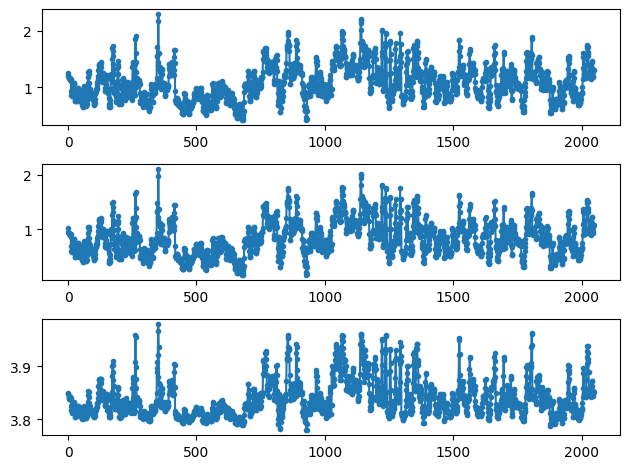

In [77]:
fig, ax = plt.subplots(nrows=3, ncols=1)

_ = ax[0].plot(np.log10(density_skew0), marker='.')
_ = ax[1].plot(np.log10(densityHI_skew0), marker='.')
_ = ax[2].plot(np.log10(temp_skew0), marker='.')

_ = plt.tight_layout()

Lastly, we have created a `ChollaOnTheFlySkewers` object that helps in interacting with the skewers along any dimension, where we use a `ChollaGrid` to calculate the differential Hubble flow along a skewer.

In [78]:
from cholla_api.OTFanalysis.ChollaOnTheFlySkewers import ChollaOnTheFlySkewers

In [79]:
nSkewerOutput = 0
OTFSkewers = ChollaOnTheFlySkewers(nSkewerOutput, skewers_dir, grid)

In [80]:
OTFSkewers.__dict__

{'OTFSkewersfPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/skewers/0_skewers.h5',
 'nx': 2048,
 'ny': 2048,
 'nz': 2048,
 'Omega_R': 9.18240850059e-05,
 'Omega_M': 0.3069,
 'Omega_L': 0.6931,
 'Omega_K': -9.182408500585382e-05,
 'w0': -1.0,
 'wa': 0.0,
 'H0': 67.97,
 'current_a': 0.1,
 'current_z': 9.0,
 'dvHubble': 4.2881419713379785,
 'xskew_str': 'skewers_x',
 'yskew_str': 'skewers_y',
 'zskew_str': 'skewers_z'}

From this object, we can work our way back down to grab an individual skewer

In [81]:
skewx_all = OTFSkewers.get_skewersx_obj(n_stride)
skewx0 = skewx_all.get_skewer_obj(skew_id)

density_skew0 = skew0.get_skewerdata(skew0.density_str)
densityHI_skew0 = skew0.get_skewerdata(skew0.HI_str)
temp_skew0 = skew0.get_skewerdata(skew0.temp_str)

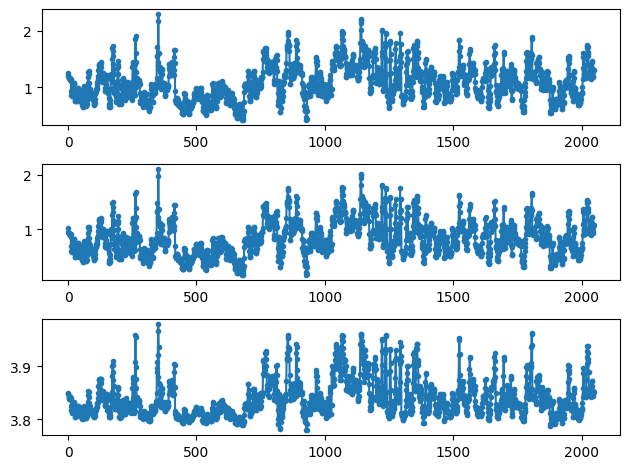

In [82]:
fig, ax = plt.subplots(nrows=3, ncols=1)

_ = ax[0].plot(np.log10(density_skew0), marker='.')
_ = ax[1].plot(np.log10(densityHI_skew0), marker='.')
_ = ax[2].plot(np.log10(temp_skew0), marker='.')

_ = plt.tight_layout()

The on-the-fly analysis will output the power spectrum and overdensity-temperature phase space 2d histogram. To describe a power spectrum, we have the `ChollaOnTheFlyPowerSpectrumHead` which information to create the log $k$-mode bins

In [83]:
from cholla_api.OTFanalysis.ChollaOnTheFlyAnalysis import ChollaOnTheFlyPowerSpectrumHead

In [84]:
# differential step in log k-space
dlogk = 0.0001
# number of line-of-sight cells, assume cube and just use x dimension
n_los = grid.nx_global
# number of FFT bins
n_fft = int(n_los / 2 + 1)
# just use the same differential hubble flow as the skewers
dvHubble = OTFSkewers.dvHubble

ps_head = ChollaOnTheFlyPowerSpectrumHead(dlogk, n_fft, n_los, dvHubble)

In [85]:
ps_head.__dict__

{'dlogk': 0.0001,
 'n_fft': 1025,
 'n_los': 2048,
 'dvHubble': 4.2881419713379785,
 'l_kmin': -3.145419239442889,
 'l_kmax': -0.13511928280307708,
 'l_kstart': -3.149784044845339,
 'n_bins': 30147}

We can tie this power spectrum information to a specific analysis file to create a `ChollaOnTheFlyPowerSpectrum` object

In [86]:
from cholla_api.OTFanalysis.ChollaOnTheFlyAnalysis import ChollaOnTheFlyPowerSpectrum

In [87]:
analysis_dir = basesim_path + "/analysis"
analysis_fName = "0_analysis.h5"
analysis_fPath = analysis_dir + "/" + analysis_fName

ps0 = ChollaOnTheFlyPowerSpectrum(ps_head, analysis_fPath)

In [88]:
ps0.__dict__

{'OTFPowerSpectrumHead': <cholla_api.OTFanalysis.ChollaOnTheFlyAnalysis.ChollaOnTheFlyPowerSpectrumHead at 0x7f9ec5d624d0>,
 'fPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/analysis/0_analysis.h5',
 'powerspectrum_key': 'p(k)',
 'kcenters_key': 'k_vals'}

From this object, we can return the $k$ centers of each bin, as well as the power spectrum value at that bin

In [89]:
kvals = ps0.get_kvals()
powerspectrum = ps0.get_powerspectrum()

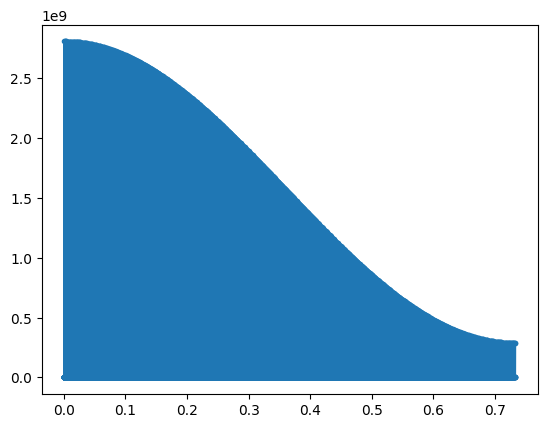

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1)

_ = ax.plot(kvals, powerspectrum, marker='.')

Ooops! For some reason, there are lots of zero values. We can mask those away and place log-scale axes on both sides

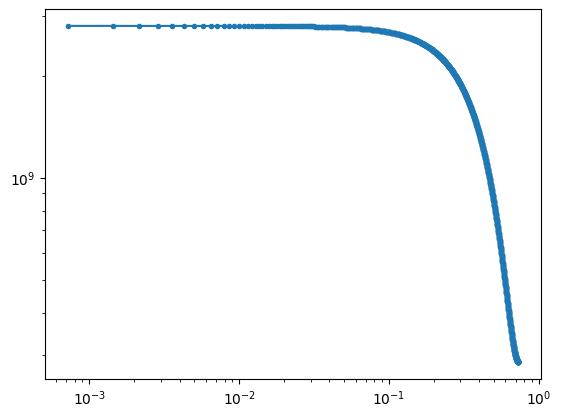

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=1)

_ = ax.plot(kvals[powerspectrum!=0], powerspectrum[powerspectrum!=0], marker='.')
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')

We can similarly describe the parameters that set the phase space with `ChollaOnTheFlyPhaseSpaceHead`

In [92]:
from cholla_api.OTFanalysis.ChollaOnTheFlyAnalysis import ChollaOnTheFlyPhaseSpaceHead

In [93]:
# number of bins along each axis
n_dens, n_temp = 1000, 1000
# temperature limits
temp_min, temp_max = 1e0, 1e8
# density limits
dens_min, dens_max = 1e-3, 1e6

phaseHead = ChollaOnTheFlyPhaseSpaceHead(dens_min, dens_max, temp_min, temp_max, n_dens, n_temp)

In [94]:
phaseHead.__dict__

{'density_min': 0.001,
 'density_max': 1000000.0,
 'T_min': 1.0,
 'T_max': 100000000.0,
 'n_density': 1000,
 'n_temp': 1000}

We tie this to a specific implementation of a phase space by tieing this object to some file to create a `ChollaOnTheFlyPhaseSpace` object

In [95]:
from cholla_api.OTFanalysis.ChollaOnTheFlyAnalysis import ChollaOnTheFlyPhaseSpace

In [96]:
phaseSpace = ChollaOnTheFlyPhaseSpace(phaseHead, analysis_fPath)

From which we can grab the saved histogram

In [97]:
phasespace = phaseSpace.get_phasespace()

/tmp/ipykernel_2175/3570544922.py:3: RuntimeWarning: divide by zero encountered in log10
  _ = ax.imshow(np.log10(phasespace), origin='lower')


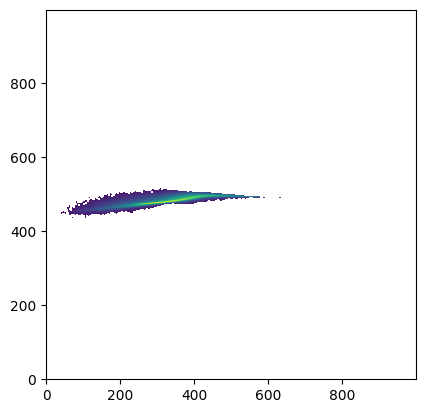

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1)

_ = ax.imshow(np.log10(phasespace), origin='lower')

We can combine the on-the-fly analysis objects to easily interact with one analysis output by using a `ChollaOnTheFlyAnalysis` object, where we use a `ChollaGrid` object to help calculate the differential hubble flow through a cell

In [99]:
from cholla_api.OTFanalysis.ChollaOnTheFlyAnalysis import ChollaOnTheFlyAnalysis

In [100]:
nAnalysisOutput = 0
OTFAnalysis = ChollaOnTheFlyAnalysis(nAnalysisOutput, analysis_dir, grid)

In [101]:
OTFAnalysis.__dict__

{'nAnalysis': 0,
 'OTFAnalysisfPath': '/lustre/orion/ast206/proj-shared/runs/2048_50Mpc_v22_DESI_test/2048_50Mpc_v22_DESI_CMB/analysis/0_analysis.h5',
 'n_fft': 1025,
 'n_los': 2048,
 'Omega_R': 9.18240850059e-05,
 'Omega_M': 0.3069,
 'Omega_L': 0.6931,
 'Omega_K': -9.182408500585382e-05,
 'w0': -1.0,
 'wa': 0.0,
 'H0': 67.97,
 'current_a': 0.1,
 'current_z': 9.0,
 'dvHubble': 4.2881419713379785,
 'n_dens': 1000,
 'n_temp': 1000,
 'dens_min': 0.001,
 'dens_max': 1000000.0,
 'temp_min': 1.0,
 'temp_max': 100000000.0}

This object allows us to grab individual `ChollaOnTheFlyPowerSpectrum` or `ChollaOnTheFlyPhaseSpace` instances, and grabbing the data that is saved

In [102]:
phasespace = OTFAnalysis.get_phasespace()
kvals = OTFAnalysis.get_kvals(dlogk)
powerspectrum = OTFAnalysis.get_powerspectrum(dlogk)

/tmp/ipykernel_2175/4273660297.py:7: RuntimeWarning: divide by zero encountered in log10
  _ = ax[1].imshow(np.log10(phasespace), origin='lower')


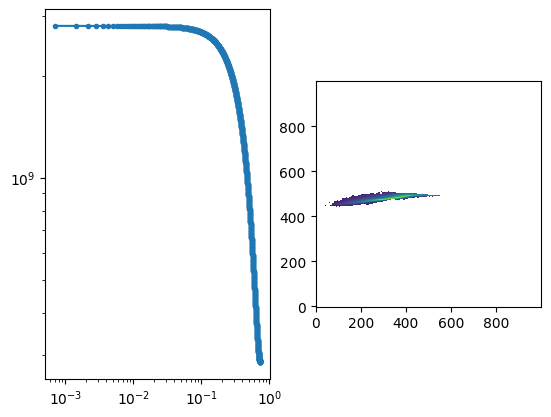

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2)

_ = ax[0].plot(kvals[powerspectrum!=0], powerspectrum[powerspectrum!=0], marker='.')
_ = ax[0].set_xscale('log')
_ = ax[0].set_yscale('log')

_ = ax[1].imshow(np.log10(phasespace), origin='lower')

Beautiful!

This notebook should have covered most of the important parts required to start using this Cholla-API. 

Comments? Questions? Feedback? Reach out to digarza@ucsc.edu